<h1>Basic project with python and sql database</h1>

<strong>Import libraries, make the connection with the database and transform query results to a dataframe.</strong>

In [6]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

conn = sqlite3.connect("Northwind.db")
# Top 10 product by revenue
query = '''

SELECT p.ProductName, SUM(p.Price * od.Quantity) as Revenue
FROM OrderDetails od
JOIN Products p ON p.ProductID = od.ProductID 
GROUP BY od.ProductID
ORDER BY Revenue DESC
LIMIT 10
'''

top_products = pd.read_sql_query(query, conn)

#Checking the resulted dataframe
print(top_products)

               ProductName   Revenue
0            Côte de Blaye  62976.50
1  Thüringer Rostbratwurst  20796.72
2     Raclette Courdavault  19030.00
3           Tarte au sucre  16022.50
4        Camembert Pierrot  14620.00
5             Alice Mutton  12909.00
6   Gnocchi di nonna Alice  10222.00
7   Mozzarella di Giovanni   9396.00
8             Vegie-spread   9175.10
9    Manjimup Dried Apples   8639.00


<strong>Plot results for better insight</strong>

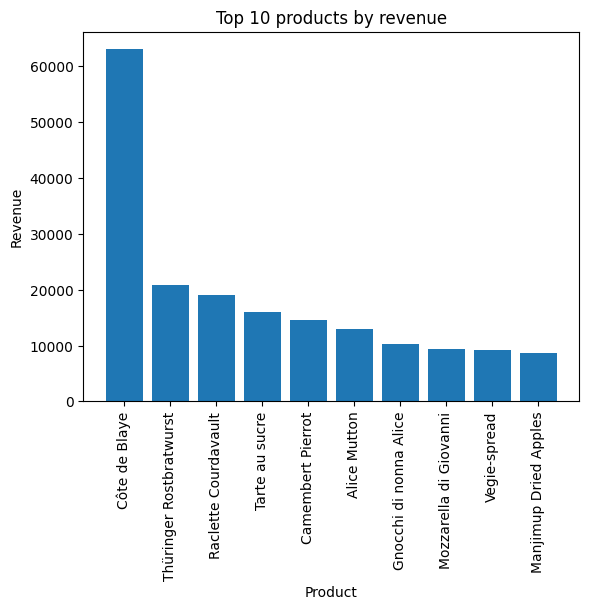

In [11]:
plt.bar(top_products['ProductName'], top_products['Revenue'])
plt.title('Top 10 products by revenue')
plt.xlabel('Product')
plt.ylabel('Revenue')
plt.xticks(rotation=90)
plt.show()

<strong>Look for most profitable employee.</strong>

In [21]:
# Top 10 profitable employees
query2 = '''

SELECT FirstName || " " || LastName as Employee, COUNT(*) as Total_sales FROM
Orders o
JOIN
Employees e ON e.EmployeeID = o.EmployeeID
GROUP BY FirstName || " " || LastName
ORDER BY Total_sales DESC
'''

top_employees = pd.read_sql_query(query2, conn)
print(top_employees)

           Employee  Total_sales
0  Margaret Peacock           40
1   Janet Leverling           31
2     Nancy Davolio           29
3    Laura Callahan           27
4     Andrew Fuller           20
5    Michael Suyama           18
6       Robert King           14
7   Steven Buchanan           11
8    Anne Dodsworth            6


<strong>Plot top employees</strong>

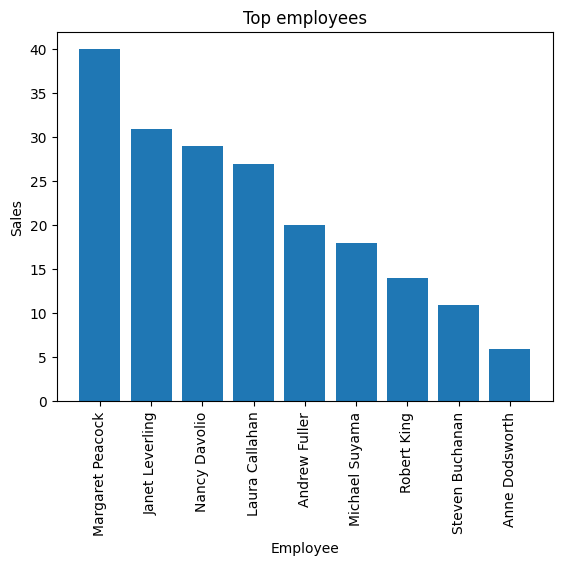

In [22]:
plt.bar(top_employees['Employee'], top_employees['Total_sales'])
plt.title('Top employees')
plt.xlabel('Employee')
plt.ylabel('Sales')
plt.xticks(rotation=90)
plt.show()